# THE OBJECTIVE OF THIS STUDY IS TO PREDICT WHETHER A PERSON WILL MAKE A PURCHASE OR NOT

Social network ads are commonly deployed due to their cost effective nature and ease of deployment. In the observed dataset we will observe the use of specific parameters and their predictive probality on purchases. In order to have a successful campaign the parameters need to correlate to purchases as well as be statistcally significant. It is important that the ads be deployed more specifically to users that would be more likely to make a purchase than not. 

## Objective of Social Network Ad Campaign

This project uses a dataset with specific measured parameters that may influence the purchase outcome from users. We will try to incorporate any finding to business insight that may be used to optimize ad deployment based on refined criteria.

* Determine if there are correlations between Purchased frequency and parameters measured (Gender, Age, Estimated Salary). Determine if more data is necessary or if specific data has more relevenace to purchase frequency.

* Determine if there is a statistically relevant correlation between measured values and their impact on purchases. 

* Create a regression model using machine learning to predict purchase outcome from paramaters. Decide what is needed for improvement and optimization for ad deployment success. 

## Purpose of the Model 

To meet the campaign objective and generate the most amount of purchases per user. We need a model that fits this data and criteria well.  

* To arrange the dataset into training and testing sets.
* To fit and predict on different class of models. 
* To measure different evaluation metrics in order to identify the best model. 
* For all models the classification report scores for category '1' are optimal as this is reflective of purchases.

In [1]:
# imports

import pandas as pd
import numpy as np
% pylab inline
import operator
import re
from collections import OrderedDict
import seaborn as sns
import pickle
import os.path
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams
from sklearn import preprocessing
import pylab as pl
%matplotlib inline
import math
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')

## Data Preprocessing

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


From the data we can see that there are only 400 rows of data, this may prove insufficient to our predicitons. We will still be able to determine what can be predicted or improved upon with addition of data. In cases of initial deployment this may be the case for reflective value on business insight. 

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We can also see our column values: Gender, Age, Estimated Salary, Purchased

We will use these to determine any correlative significance on Purchased. We can also see that Gender is categorical and that Purchased is binary. We can see that the dependent variable that we are measuring is categorical and binary meaning logistic regression would be useful.

## Exploratory Data Analysis

We will now analyze the relationships between the variables and their impact on purchases. We will modify the dataset to better handle our analytical process. 

In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
print (sum([df.Purchased == 0]))
print (sum([df.Purchased == 1]))

257
143


Total purchased is 143 whereas non-purchased is 257. It can also be verified that this accounts for the 400 transactions. We can see that 35.75% of users made purchases and 64.25% did not. Let's try to make a visualization for this.

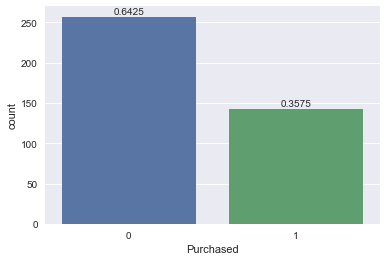

In [7]:
ax = sns.countplot(x="Purchased", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/len(df)),
            ha="center") 
plt.show()

In [8]:
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


We observe from the mean that both the average Age and Estimated Salary for users that Purchased is significantly higher than for non-purchased.

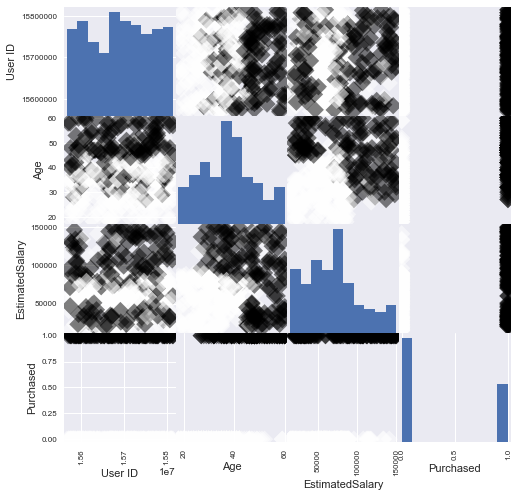

In [9]:
_= pd.scatter_matrix(df, c=df['Purchased'], figsize= [8,8], s=150,marker='D')

From this scatter plot we can see that there is a correlation between Estimated Salary and Age. This is just to show the correlations and relations of the variable in the dataset relative to purchases. User ID will not be used further as it does not provide insight to purchases as a whole, it would be included in the event that particular user made significant purchases. We can see its correlations do not indicate that with relation to age and salary. 

In [10]:
df.groupby('Gender').mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


We can see initial observations that 37.74% of females are likely to purchase and only 33.67% of males are likely to purchase. We also see that the average Age and Estimated Salary is higher in Females than Males. The significance is quite strong for the assumption that the sample populaiton can be measured from age against Estimated Salary to provide enough significance for purchase outcome.

In [11]:
df.groupby('Age').mean()

,User ID,EstimatedSalary,Purchased
Age,,,
18,1.567696e+07,66400.000000,0.000000
19,1.571065e+07,46000.000000,0.000000
20,1.569884e+07,61714.285714,0.000000
21,1.565027e+07,61000.000000,0.000000
22,1.568825e+07,48800.000000,0.000000
23,1.564283e+07,51166.666667,0.000000
24,1.569152e+07,49111.111111,0.000000
25,1.568253e+07,65166.666667,0.000000
26,1.571145e+07,53500.000000,0.000000


Observations from Age show that higher Age range is more likely to make a purchase than younger. An Estimated Salary above $40,000 seems to be common with purchase frequency.

In [12]:
df.groupby('EstimatedSalary').mean()

,User ID,Age,Purchased
EstimatedSalary,,,
15000,1.572291e+07,28.250000,0.000000
16000,1.562951e+07,23.500000,0.000000
17000,1.571410e+07,27.666667,0.000000
18000,1.565260e+07,29.250000,0.000000
19000,1.565214e+07,21.500000,0.000000
20000,1.570994e+07,36.400000,0.400000
21000,1.566767e+07,35.500000,0.500000
22000,1.564976e+07,39.200000,0.400000
23000,1.565773e+07,40.142857,0.571429


Observations from Estimated Salary show that generally higher values reflect on positive outcome for purchases. Age is dispersed with no unique pattern. As mentioned before we can see that from $46,000 purchase frequency is more prominent. 

We are able to see that the total number of purchases made was 143 and non-purchases was 257. The total is verified as 400 representing our sample size.

In [13]:
GP= df[['Gender','Purchased']]
GP.head()

,Gender,Purchased
0,Male,0
1,Male,0
2,Female,0
3,Female,0
4,Male,0


Generateing a table with respect to Gender and Purchased. We will need to separate the gender variable to make accurate observations and see if either gender has more to contribute for insights. 

In [14]:
freq= GP.pivot(columns='Gender', values= 'Purchased')
freq.head()

Gender,Female,Male
0,NaN,0.0
1,NaN,0.0
2,0.0,NaN
3,0.0,NaN
4,NaN,0.0


Separating purchases based on values. This way we can make observations on the specific genders to classify their significance on purchases. 

In [15]:
freq.describe()

Gender,Female,Male
count,204.000000,196.000000
mean,0.377451,0.336735
std,0.485942,0.473804
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Looking at the frequency characterstics of the genders we see there are more females than males by 0.5% of total population. Now we need to observe what the purchases and non-purchases are of each gender specifically. 

In [16]:
pd.crosstab(GP.Gender, GP.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


Here we can see the number of purchases made by each gender and the quantities. We can see that there are 77 Purchases contributing to the Female purchases and 66 for the Males. The clear majority in both genders is the non-purchases being 127 for females and 130 for males. We can also verify that the Nan values did not impact the data as the total is also 400 reflecting our total population. 

In [17]:
print(77/127)

print(66/130) 


0.6062992125984252
0.5076923076923077


The female purchase percentage is 60.63% whereas the male purchase percentage is 50.77%. The female likelihood for purchases is significantly higher than that for males. 

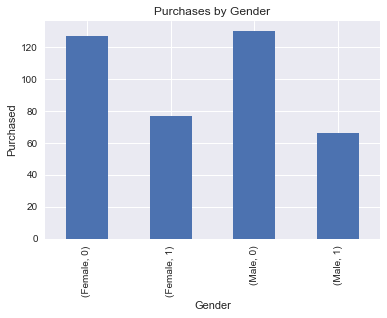

In [18]:
_= GP.groupby([GP['Gender'], GP['Purchased']]).size().plot(kind='bar')
_= plt.xlabel('Gender')
_= plt.ylabel('Purchased')
_= plt.title('Purchases by Gender')
plt.show()

Visualizing the previous observation and calculation we can see the distinctions of the purchase activity by both genders. 

In [19]:
# Assign variable for each gender from dataset 
all_f = df[GP['Gender'] == 'Female']
all_m = df[GP['Gender'] == 'Male']

# Sample size by gender
l_f= len(all_f)
l_m= len(all_m)
print(l_f)
print(l_m)

# Samples that purchased
p_f= all_f.Purchased.sum()
p_m= all_m.Purchased.sum()

# Ratio of purchased 
P_f= p_f/l_f
P_m= p_m/l_m


print([P_f, P_m])



204
196
[0.37745098039215685, 0.336734693877551]


Since both sample sizes are different we will need to use both sample populations for further calculations. We can also observe from the calculaitons that approximately 37.75% of Females have Purchased whereas only 33.67% of Males have purchased. 

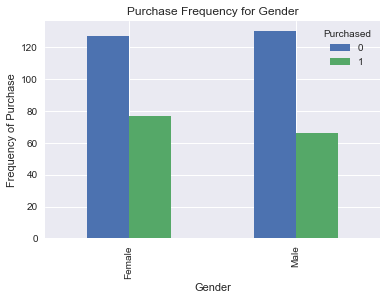

In [20]:
pd.crosstab(df.Gender,df.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchase')

This visualization matches our previous observations. 

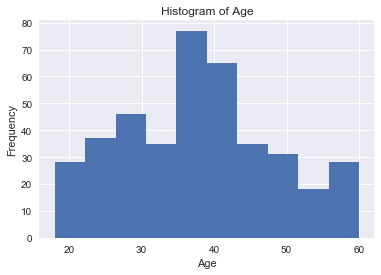

In [21]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

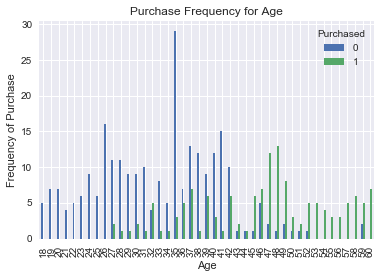

In [22]:
pd.crosstab(df.Age,df.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')

From this barplot of Purchase Frequency for Age we can see that there are more purchases as age goes up and lack thereof from 27 below. This is also significant for non-purchases as the concentration of non-purchases is mainly with the younger populous. From the Age histogram we can see a spike in age frequency at approximately 40.

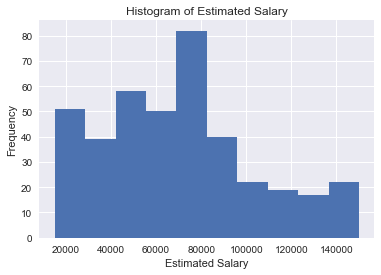

In [23]:
df.EstimatedSalary.hist()
plt.title('Histogram of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

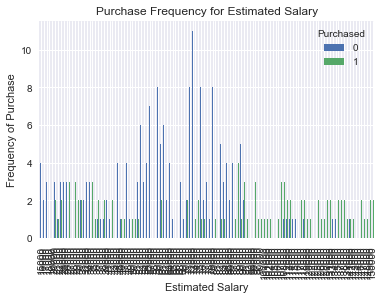

In [24]:
pd.crosstab(df.EstimatedSalary,df.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency of Purchase')

From Purchase Frequency for Estimated Salary we can see that the green purchase ticks have a relative even distribution. The purchase markers are throughout the plot. From the Esimated Salary histogram we can see a large density in frequency of salaries from approximately $20000 to $80000.

In [25]:
cat_vars=['Gender']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    data=data1

In [26]:
cat_vars=['Gender']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [27]:
df1=data[to_keep]
df1.columns.values

array(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'], dtype=object)

In [28]:
df1.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


From the above correlation matrix we can drop the variables which have correlation value less than .05 with Purchased as it does not have enough influence on the outcome. There is a need to drop the variable Gender_Male as it is the inverse relation of the variable Gender_Female. In both genders there is not enough correlative value with purchased, so both will be excluded in further observations. Age and Estimated Salary are good indicators for Purchased as their correlations are 0.622 and 0.362 respectively.

In [29]:
data_final_vars=df1.columns.values.tolist()
y=['Purchased']
X=[i for i in data_final_vars if i not in y]

In [30]:
cols= ['Age', 'EstimatedSalary']
X= df1[cols]
y= df1['Purchased']

### T-test, Confidence intervals, ECDF

In [31]:
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df1['Age'].mean()) 

(35.68908765677061, 39.620912343229392)

In [32]:
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df1['EstimatedSalary'].mean()) 

(69740.534087656764, 69744.465912343236)

In [33]:
mean1, sigma1 = np.mean(df1['Age']), np.std(df1['Age'])
conf_int_a1 = stats.norm.interval(0.95, loc=mean1, scale=sigma1)
conf_int_b1 = stats.norm.interval(0.95, loc=mean1, scale=sigma1 / np.sqrt(len(df1['Age'])))

conf_int_a1
conf_int_b1

(36.628981903116795, 38.681018096883207)

In [34]:
mean2, sigma2 = np.mean(df1['EstimatedSalary']), np.std(df1['EstimatedSalary'])
conf_int_a2 = stats.norm.interval(0.95, loc=mean2, scale=sigma2)
conf_int_b2 = stats.norm.interval(0.95, loc=mean2, scale=sigma2 / np.sqrt(len(df1['EstimatedSalary'])))

conf_int_a2
conf_int_b2

(66405.238707860015, 73079.761292139985)

In [35]:
def ecdf(df1):
    
    # Number of data points: n
    n = len(df1)

    # a-data for the ECDF: x
    a = np.sort(df1)

    # b-data for the ECDF: y
    b = np.arange(1, n+1) / n

    return a, b

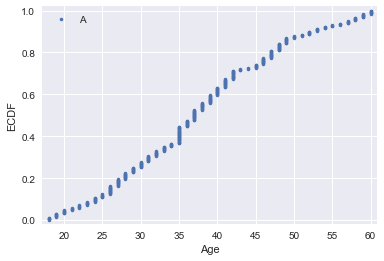

In [36]:
a, b = ecdf(df1['Age'])

# Generate plot
_ = plt.plot(a, b, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Age'))

# Display the plot
plt.show()

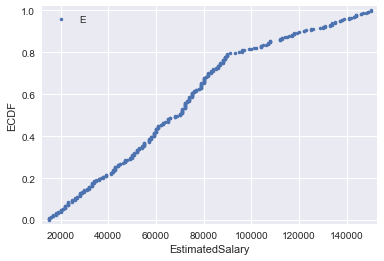

In [37]:
a, b = ecdf(df1['EstimatedSalary'])

# Generate plot
_ = plt.plot(a, b, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('EstimatedSalary')
_ = plt.ylabel('ECDF')
_ = plt.legend(('EstimatedSalary'))

# Display the plot
plt.show()

### Feature Selection

In [38]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True]
[1 1]


The Recursive Feature Elimination(RFE) tells us that there is no feature that can be eliminated from the index. All features in the new index are relevant, that's why we picked them!

In [39]:
import statsmodels.api as sm
logit_model=sm.OLS(y,X).fit()
result=logit_model.predict(X)
print(logit_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 23 Jan 2018   Prob (F-statistic):           2.20e-62
Time:                        22:25:21   Log-Likelihood:                -219.16
No. Observations:                 400   AIC:                             442.3
Df Residuals:                     398   BIC:                             450.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0086      0.001     

This model explains 50% of the variance in the dependent variable. The null-hypothesis in both instances can be rejected since the P-values are less than the confidence level which signifies strong evidence to reject the null-hypothesis. Purchases are significantly tied to both Age and Estimated Salary. As purchased increases by a unit of 1 Age and Estimated Salary increase by 0.0086 and 1.313e-06 respectively. 

In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.686532
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jan 2018   Pseudo R-squ.:                -0.05302
Time:                        22:25:21   Log-Likelihood:                -274.61
converged:                       True   LL-Null:                       -260.79
                                        LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0054      0.006     -0.982      0.326      -0.016       0.005
EstimatedSalar

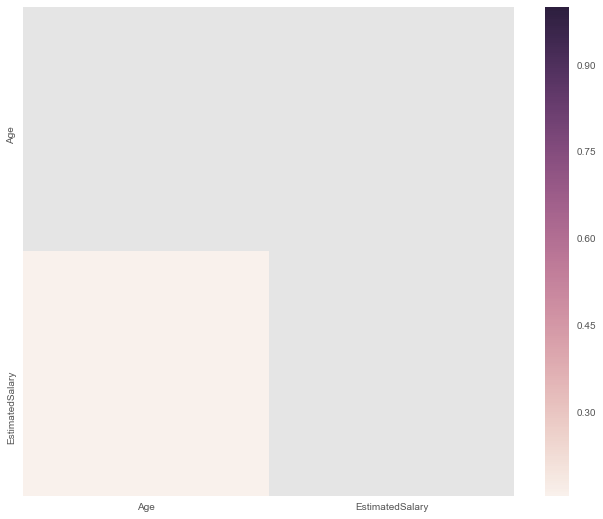

In [65]:
fig = plt.figure(figsize = (11,9))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), mask = mask);

From the plot we can see that there is a correlation between Age and Estimated Salary.

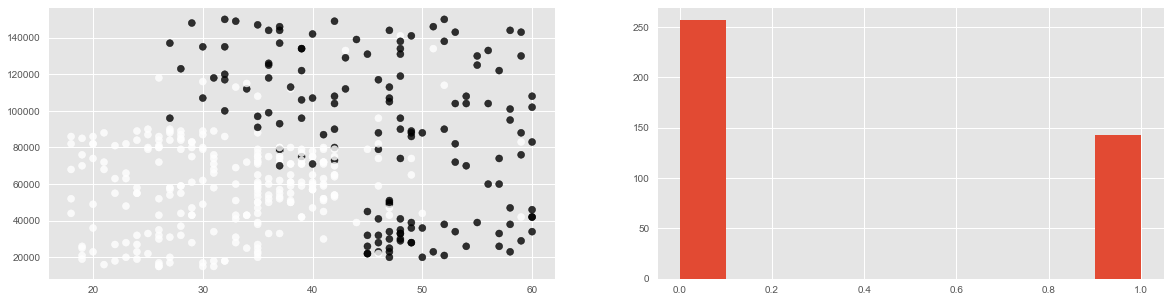

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.scatter(X.Age , X.EstimatedSalary,  c = y, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.hist(y)
plt.show()

# Model Selection 

# Logistic Regression

0.7
[[56  0]
 [24  0]]
             precision    recall  f1-score   support

          0       0.70      1.00      0.82        56
          1       0.00      0.00      0.00        24

avg / total       0.49      0.70      0.58        80

logreg - mean-squared error:
 0.5477225575051661



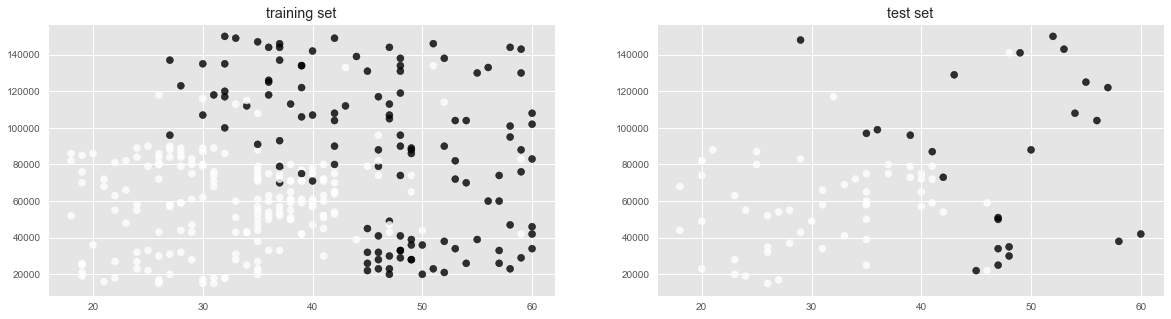

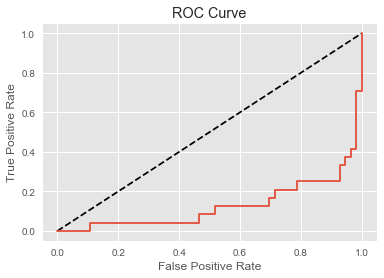

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=21)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Print the accuracy
print(logreg.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('logreg - mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Using logistic regression classifier we can see that the model is severely underfit and generated an accuracy score of 62.5%. The precision, recall and f1 scores for Purchased being '1' are all zero, this is a better predictor for non-purchases than it is for purchases. The ROC also reflects an inverse from what we would expect with a higher false positive rate than true positive rate. 

In [68]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring= 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.12797619047619047
AUC scores computed using 5-fold cross-validation: [ 0.20590186  0.03680371  0.13116971  0.23389356  0.79481793]


The AUC score is very bad. We can assumably relate this to the dataset being small in size. This model does not perform well with our dataset and is severely underfit with only two parameters with more parameteres it may perform better. 

In [69]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the accuracy
print(logreg_cv.score(X_test, y_test))

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

0.7
Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.6625


Tuned Logistic Regression Parameter: {'C': 3.7275937203149381, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.8375
[[56  0]
 [24  0]]
             precision    recall  f1-score   support

          0       0.70      1.00      0.82        56
          1       0.00      0.00      0.00        24

avg / total       0.49      0.70      0.58        80

logreg - mean-squared error:
 0.5477225575051661



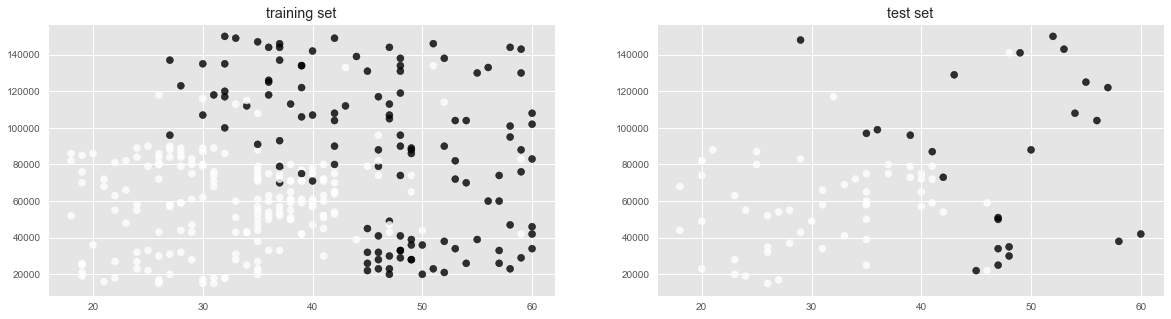

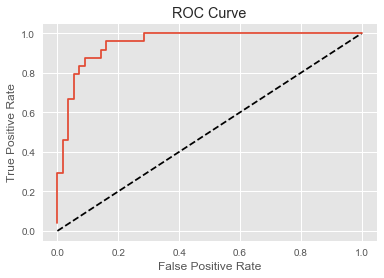

In [110]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=21)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('logreg - mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The tuned logistic regression using gridsearch cv produced the best results for logistic regression classifier. The ROC improved drastically and shows a very high true positive rate that reaches 100% very quickly. The tuned accuracy also increased to 83.75%.

# Elastic Net

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.034482758620689655}
Tuned ElasticNet R squared: 0.48390458251517826
Tuned ElasticNet MSE: 0.10838003767181252


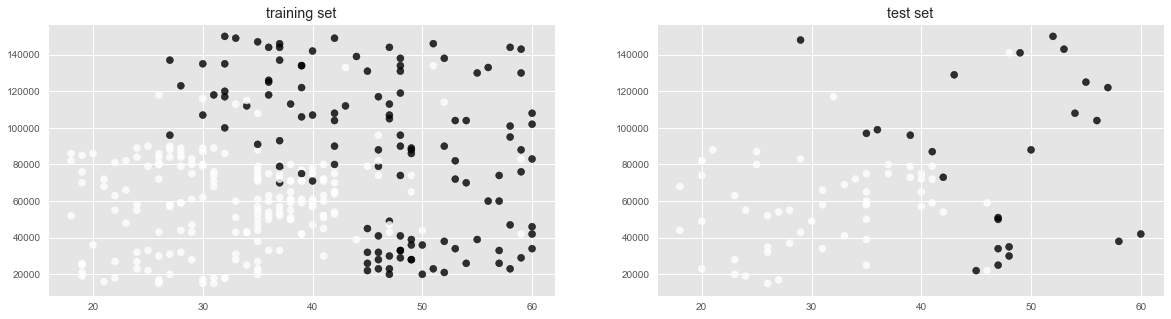

In [113]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

In [72]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[ 0.35846836 -0.49447785  0.35041567  0.24423586  0.07339417]


## KNN

0.8625
[[46  5]
 [ 6 23]]
             precision    recall  f1-score   support

          0       0.88      0.90      0.89        51
          1       0.82      0.79      0.81        29

avg / total       0.86      0.86      0.86        80

mean-squared error:
 0.37080992435478316



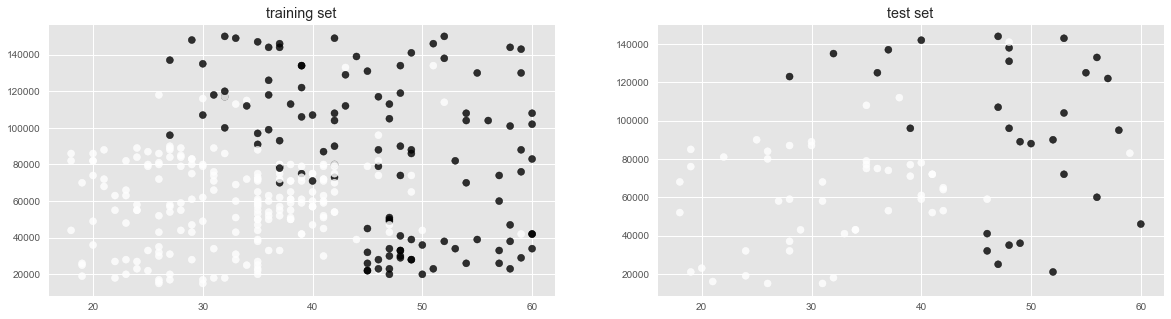

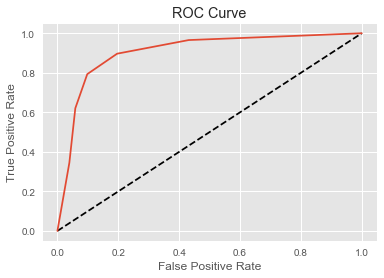

In [114]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21, stratify=y)

# Create a k-NN classifier with 5 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Seeing if we can optimize the previous results with a different K-NN value. Using 5 neighbors we were able to observe a k-NN accuracy score of 86.25%. We will assess the accuaracies of neighbors from 1 to 9 to see what would have the most accuracy for our dataset.

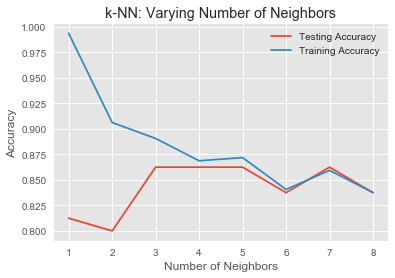

In [74]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We see that the training set and test set accuracies increase but the ideal point is from 3 to 5 neighbors due to the straightness of the line at this point. 

0.8625
[[47  4]
 [ 7 22]]
             precision    recall  f1-score   support

          0       0.87      0.92      0.90        51
          1       0.85      0.76      0.80        29

avg / total       0.86      0.86      0.86        80

mean-squared error:
 0.37080992435478316



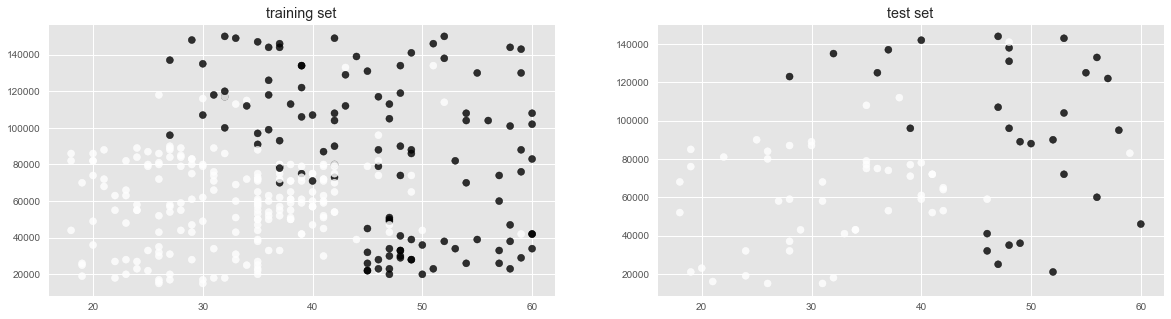

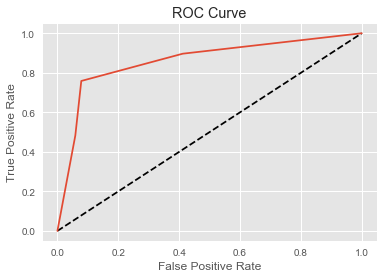

In [115]:
# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Here we can see that the k-NN value of 3 neighbors was able to produce the same accuracy as before but with the least amount of neighbors. We want the highset accuracy using the least neighbors possible for the most ideal fit for our dataset. 

In [76]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: Age                   37.655
EstimatedSalary    69742.500
dtype: float64
Standard Deviation of Unscaled Features: Age                   10.469765
EstimatedSalary    34054.312410
dtype: float64
Mean of Scaled Features: -4.4408920985006264e-17
Standard Deviation of Scaled Features: 1.0


Accuracy with Scaling: 0.9375
Accuracy without Scaling: 0.825
             precision    recall  f1-score   support

          0       0.74      0.71      0.73        56
          1       0.38      0.42      0.40        24

avg / total       0.63      0.62      0.63        80

mean-squared error:
 0.6123724356957945



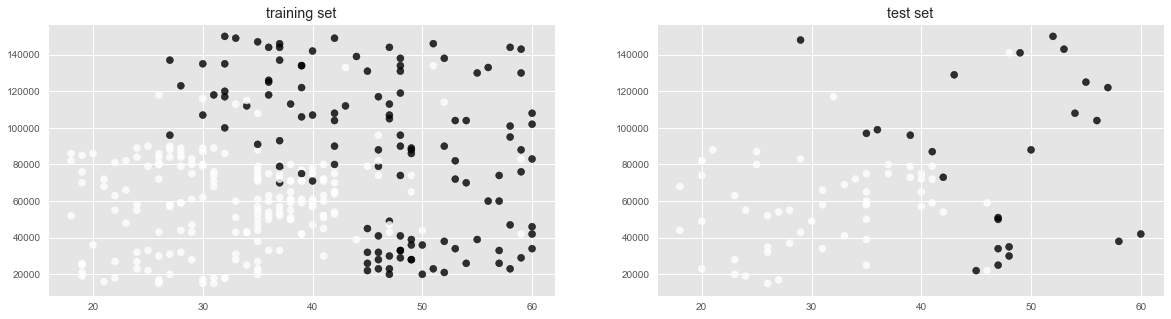

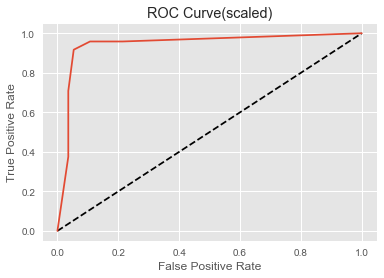

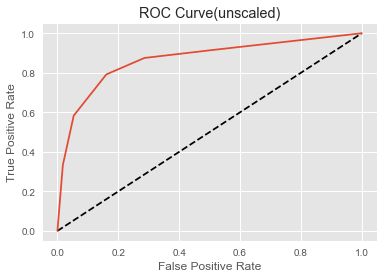

In [116]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=21)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_scaled.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(scaled)')
plt.show()

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_unscaled.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(unscaled)')
plt.show()

# SVC

In [78]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

Accuracy: 0.9
             precision    recall  f1-score   support

          0       0.73      0.96      0.83        56
          1       0.67      0.17      0.27        24

avg / total       0.71      0.72      0.66        80

mean-squared error:
 0.5244044240850758



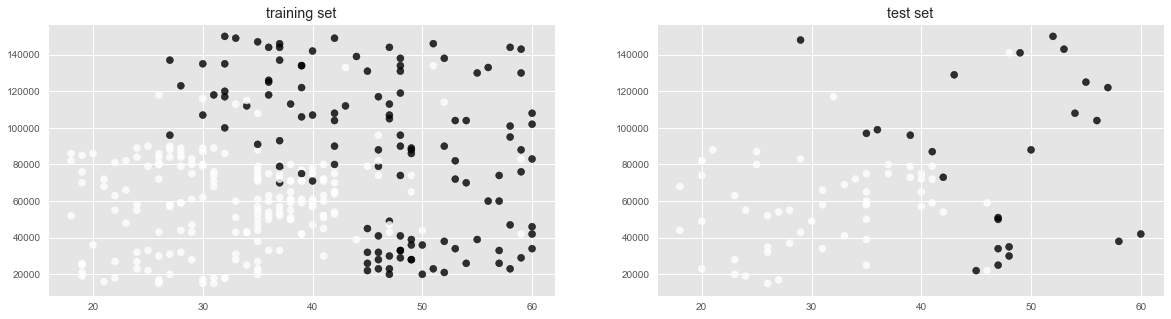

In [117]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics and accuracy
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

Accuracy: 0.9
             precision    recall  f1-score   support

          0       0.91      0.95      0.93        56
          1       0.86      0.79      0.83        24

avg / total       0.90      0.90      0.90        80

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}
mean-squared error:
 0.31622776601683794



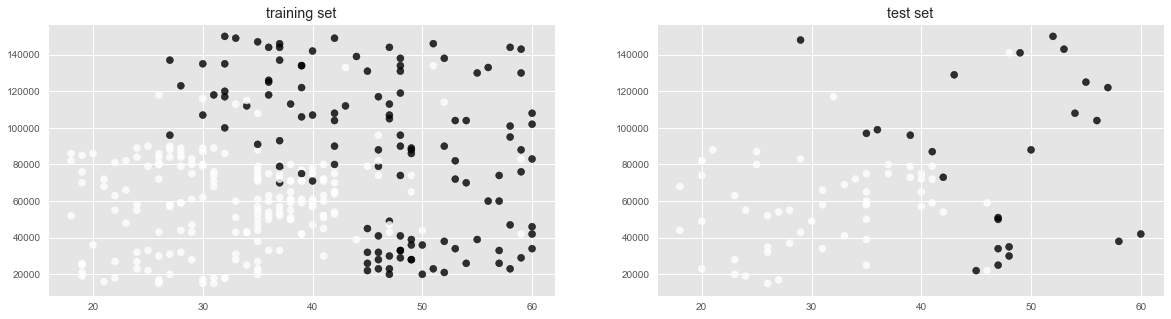

In [118]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mean-squared error:\n {}\n'.format(rmse))

plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train.Age , X_train.EstimatedSalary,  c = y_train, alpha = 0.8);
plt.subplot(1, 2, 2);
plt.scatter(X_test.Age , X_test.EstimatedSalary,  c = y_test, alpha = 0.8);
plt.title('test set')
plt.show()

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

# Conclusion

* The accuracy scores are between 48.39% and 93.75%
* The model with the best accuracy score was KNN with Standard Scaler scaling which produced 93.75% accuracy for predicting purchase outcome using variables of Age and Estimated Salary. 
* The threshold probability for classification of Purchased needs to adjust as to increase prospective purchase outcome. Per our dataset and requirements we need a high precision score to relate a low false positive rate and a recall score above 0.5 to relate to our predictability for purchases. F1 score reflects the weighted average of Precision and Recall, so for our purposes F1 score would be beneficial as well. Understanding this we will use the avg/total values of these scores for our assessment. 
* The best models for this application in my perspective would be knn with neighbors= 3 and SVC with standard scaler optimization. In both the scores in the classification report had the highest values, which is what we desire for predictive probability of Purchased.
* KNN and SVC models are teh best fit our our purposes, SVC being the most ideal. 